# AirBnB Chicago Data

Possible questions:
1. What are the most and least expensive neighborhoods?
2. Do small businesses have better ratings than hosts with a single property?
1. Can we predict price from other features?

## Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./Airbnb_Chicago_listings.csv')
df.head()

C:\Users\KDJ\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384,https://www.airbnb.com/rooms/2384,20191121092422,2019-11-21,"Walk to UChicago, 10 min train to McCormick Place",Visiting The University of Chicago or attendin...,"The private bedroom has a queen size bed, beds...",Visiting The University of Chicago or attendin...,none,My apartment is one block from beautiful Jacks...,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,2.97
1,4505,https://www.airbnb.com/rooms/4505,20191121092422,2019-11-21,One Great Apartment. 384 Great Reviews. 1 Bad ...,"We took the winter off, made things nicer arou...","We travel a lot, we know what people need. We...","We took the winter off, made things nicer arou...",none,NaN,...,t,f,moderate,f,f,1,1,0,0,2.99
2,7126,https://www.airbnb.com/rooms/7126,20191121092422,2019-11-21,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhood.,This is a very small studio apartment with a ...,A very small studio in a wonderful neighborhoo...,none,"Ukrainian Village was just named ""Hottest Neig...",...,f,f,moderate,f,f,1,1,0,0,2.93
3,9811,https://www.airbnb.com/rooms/9811,20191121092422,2019-11-21,Barbara's Hideaway - Old Town,One-bedroom hideaway tucked into Old Town step...,"This lovely one bedroom ""hideaway"" is located ...",One-bedroom hideaway tucked into Old Town step...,none,Chicago’s Old Town neighborhood is squeezed be...,...,t,f,strict_14_with_grace_period,f,f,11,11,0,0,0.72
4,10610,https://www.airbnb.com/rooms/10610,20191121092422,2019-11-21,3 Comforts of Cooperative Living,The condo is the 2nd floor in a lovely 1912 3-...,Newly furnished with queen bed and the comfort...,The condo is the 2nd floor in a lovely 1912 3-...,none,It's a 10 minute walk from the lakefront bike ...,...,t,f,moderate,f,f,5,1,4,0,0.70


Check columns indicated in error

In [2]:
df.iloc[:, 61:63].head()

,weekly_price,monthly_price
0,$350.00,NaN
1,$925.00,NaN
2,$600.00,NaN
3,"$1,050.00","$3,400.00"
4,$235.00,$805.00


In [3]:
# Drop both columns
df.drop(['weekly_price','monthly_price'], axis=1, inplace=True)

In [4]:
# Check the number of rows and columns
df.shape

(8533, 104)

## Data Wrangling

### Remove columns that don't look useful

With so many columns, we need to look to see if we can eliminate any of them.

In [5]:
# ID is presumed to be unique columns. That would be perfectly correlated to price, so we should remove it.
df.drop(['id'], axis=1, inplace=True)

In [6]:
# Check columns that average more than 30 characters in length
long_cols = df.columns[df.fillna('').astype(str).apply(lambda x:x.str.len()).mean() > 30]
long_cols

Index(['listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'picture_url', 'host_url', 'host_about',
       'host_thumbnail_url', 'host_picture_url', 'host_verifications',
       'amenities', 'jurisdiction_names'],
      dtype='object')

In [7]:
# Drop them
df.drop(long_cols, axis=1, inplace=True)

In [8]:
# Check columns with "url" in the name
url_cols = [col for col in df.columns if 'url' in col]
url_cols

['thumbnail_url', 'medium_url', 'xl_picture_url']

In [9]:
df.drop(url_cols, axis=1, inplace=True)

In [10]:
# Check columns with more than half NaN values
half_null_cols = df.columns[df.isnull().mean() > 0.5]
half_null_cols

Index(['host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet'], dtype='object')

In [11]:
df.drop(half_null_cols, axis=1, inplace=True)

In [12]:
# Check columns with "scrape" in the name
scrape_cols = [col for col in df.columns if 'scrape' in col]
scrape_cols

['scrape_id', 'last_scraped', 'calendar_last_scraped']

In [13]:
df.drop(scrape_cols, axis=1, inplace=True)

In [14]:
# Check columns with "host" in the name
host_cols = [col for col in df.columns if 'host' in col]
host_cols

['host_id',
 'host_name',
 'host_since',
 'host_location',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms']

In [15]:
# Examine some more closely
df[['host_listings_count','calculated_host_listings_count']].describe()

,host_listings_count,calculated_host_listings_count
count,8533.000000,8533.000000
mean,48.762920,11.403375
std,201.148225,23.964151
min,0.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,8.000000,7.000000
max,1820.000000,119.000000


In [16]:
# Remove "host" columns individually
df.drop(['host_name','host_total_listings_count','host_location','host_neighbourhood','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

In [17]:
# Check columns with "review" in the name
review_cols = [col for col in df.columns if 'review' in col]
review_cols

['number_of_reviews',
 'number_of_reviews_ltm',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [18]:
# Examine some of the data of those columns
df[review_cols].head()

,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,176,39,2015-01-09,2019-11-13,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2.97
1,390,25,2009-03-06,2019-11-10,96.0,10.0,9.0,10.0,10.0,9.0,9.0,2.99
2,370,48,2009-07-03,2019-11-04,93.0,10.0,9.0,10.0,10.0,10.0,10.0,2.93
3,49,16,2014-04-15,2019-10-23,92.0,10.0,9.0,10.0,9.0,10.0,9.0,0.72
4,43,11,2014-10-25,2019-10-28,82.0,8.0,7.0,9.0,9.0,10.0,9.0,0.70


In [19]:
# Drop the ones the don't look useful
df.drop(['number_of_reviews_ltm','first_review','last_review'], axis=1, inplace=True)

Check the remaining data.

In [20]:
df.head()

,experiences_offered,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,street,...,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,none,2613,2008-08-29,within an hour,100%,t,1,t,t,"Chicago, IL, United States",...,10.0,10.0,t,NaN,f,f,strict_14_with_grace_period,f,f,2.97
1,none,5775,2008-12-29,within a few hours,100%,t,1,t,t,"Chicago, IL, United States",...,9.0,9.0,t,R19000037538,t,f,moderate,f,f,2.99
2,none,17928,2009-05-19,within an hour,100%,t,2,t,f,"Chicago, IL, United States",...,10.0,10.0,t,City registration pending,f,f,moderate,f,f,2.93
3,none,33004,2009-08-21,within an hour,94%,f,10,t,t,"Chicago, IL, United States",...,10.0,9.0,t,2079260,t,f,strict_14_with_grace_period,f,f,0.72
4,none,2140,2008-08-16,within an hour,75%,f,5,t,t,"Chicago, IL, United States",...,10.0,9.0,t,City registration pending,t,f,moderate,f,f,0.70


In [21]:
df.columns

Index(['experiences_offered', 'host_id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'r

In [22]:
# Drop columns that are redundant or not useful
df.drop(['street',
         'city',
         'state',
         'market',
         'smart_location',
         'country_code',
         'country',
         'latitude',
         'longitude',
         'is_location_exact',
         'calendar_updated',
         'has_availability',
         'availability_30',
         'availability_60',
         'availability_90',
         'availability_365',
         'requires_license'
        ], axis=1, inplace=True)
df.columns

Index(['experiences_offered', 'host_id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'zipcode', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'requ

In [23]:
# Examine columns where the meaning is questionable
df[['neighbourhood','neighbourhood_cleansed','guests_included', 'extra_people','minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm']].head()

,neighbourhood,neighbourhood_cleansed,guests_included,extra_people,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
0,Hyde Park,Hyde Park,1,$0.00,2,2,1125,1125,2.0,1125.0
1,Little Village,South Lawndale,2,$25.00,1,1,60,60,1.0,60.0
2,Ukrainian Village,West Town,1,$0.00,2,2,60,60,2.0,60.0
3,Old Town,Lincoln Park,2,$25.00,4,4,180,180,4.0,180.0
4,Hyde Park,Hyde Park,1,$10.00,2,2,365,365,2.0,365.0


In [24]:
# Drop the ones that don't seem very useful
df.drop(['neighbourhood','minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm'], axis=1, inplace=True)
df.head()

,experiences_offered,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,none,2613,2008-08-29,within an hour,100%,t,1,t,t,Hyde Park,...,10.0,10.0,10.0,NaN,f,f,strict_14_with_grace_period,f,f,2.97
1,none,5775,2008-12-29,within a few hours,100%,t,1,t,t,South Lawndale,...,10.0,9.0,9.0,R19000037538,t,f,moderate,f,f,2.99
2,none,17928,2009-05-19,within an hour,100%,t,2,t,f,West Town,...,10.0,10.0,10.0,City registration pending,f,f,moderate,f,f,2.93
3,none,33004,2009-08-21,within an hour,94%,f,10,t,t,Lincoln Park,...,9.0,10.0,9.0,2079260,t,f,strict_14_with_grace_period,f,f,0.72
4,none,2140,2008-08-16,within an hour,75%,f,5,t,t,Hyde Park,...,9.0,10.0,9.0,City registration pending,t,f,moderate,f,f,0.70


In [25]:
# Check values in "license" column
df.groupby(['license'])['host_id'].count()

license
"City Registration Pending"                   1
"City registration pending"                   2
00000                                         1
000000                                        1
06251706                                      1
07246668                                      6
1234                                          1
13128022737                                   1
17000013555                                   2
17000020425                                   1
18000025373                                   1
18000027242                                   1
180001128                                     1
190000037466                                  1
19000037466                                   1
19000040889                                   1
2074659                                       1
2074660                                       1
2079260                                       1
2079725                                       1
2079726                         

In [26]:
# This column is too messy to efficiently encode responses
df.drop(['license'], axis=1, inplace=True)

In [27]:
# Check counts in "host_response_time" column
df.groupby(['host_response_time'])['host_id'].count()

host_response_time
a few days or more      41
within a day           437
within a few hours     961
within an hour        6270
Name: host_id, dtype: int64

In [28]:
# Check counts in "experiences_offered" column
df.groupby(['experiences_offered'])['host_id'].count()

experiences_offered
none    8533
Name: host_id, dtype: int64

In [29]:
# This has no variability
df.drop(['experiences_offered'], axis=1, inplace=True)

In [30]:
# Check counts in "cancellation_policy" column
df.groupby(['cancellation_policy'])['host_id'].count()

cancellation_policy
flexible                       2114
moderate                       2914
strict_14_with_grace_period    3430
super_strict_30                  24
super_strict_60                  51
Name: host_id, dtype: int64

In [31]:
df.describe()

,host_id,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,8.533000e+03,8533.000000,8533.000000,8530.000000,8529.000000,8528.000000,8533.000000,8533.000000,8533.000000,8533.000000,7289.000000,7289.000000,7289.000000,7288.000000,7287.000000,7288.000000,7288.000000,7338.000000
mean,9.136513e+07,48.762920,4.331654,1.376436,1.643217,2.247420,2.248682,5.577523,663.607641,41.096215,95.187817,9.732748,9.576074,9.818880,9.822012,9.691136,9.510291,2.518688
std,8.758527e+07,201.148225,2.972712,0.779565,1.200537,1.972722,2.012976,21.054040,530.573434,60.453440,6.671592,0.668751,0.751149,0.572567,0.565276,0.660159,0.739338,2.097065
min,2.140000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.020000
25%,1.572523e+07,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,3.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,0.860000
50%,5.597679e+07,2.000000,4.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1125.000000,17.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.030000
75%,1.572620e+08,8.000000,6.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1125.000000,54.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.710000
max,3.106326e+08,1820.000000,32.000000,21.000000,24.000000,50.000000,16.000000,1000.000000,9000.000000,603.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,20.830000


In [32]:
# Check datatypes of remaining columns
df.dtypes

host_id                               int64
host_since                           object
host_response_time                   object
host_response_rate                   object
host_is_superhost                    object
host_listings_count                   int64
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_cleansed               object
zipcode                              object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
price                                object
security_deposit                     object
cleaning_fee                         object
guests_included                       int64
extra_people                         object
minimum_nights                  

### Fix numeric columns

There are many columns that represent numeric data but are typed as "object". Those need to be fixed.

In [33]:
# Get list of columns typed as object
obj_cols = df.select_dtypes(include=['object']).columns
df[obj_cols].head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,property_type,room_type,bed_type,price,security_deposit,cleaning_fee,extra_people,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2008-08-29,within an hour,100%,t,t,t,Hyde Park,60637,Condominium,Private room,Real Bed,$50.00,$0.00,$0.00,$0.00,f,f,strict_14_with_grace_period,f,f
1,2008-12-29,within a few hours,100%,t,t,t,South Lawndale,60608,Apartment,Entire home/apt,Real Bed,$117.00,$0.00,$25.00,$25.00,t,f,moderate,f,f
2,2009-05-19,within an hour,100%,t,t,f,West Town,60622,Apartment,Entire home/apt,Futon,$80.00,$0.00,$0.00,$0.00,f,f,moderate,f,f
3,2009-08-21,within an hour,94%,f,t,t,Lincoln Park,60614,Apartment,Entire home/apt,Real Bed,$150.00,NaN,$95.00,$25.00,t,f,strict_14_with_grace_period,f,f
4,2008-08-16,within an hour,75%,f,t,t,Hyde Park,60615,Apartment,Private room,Real Bed,$35.00,$200.00,$50.00,$10.00,t,f,moderate,f,f


In [34]:
# Remove special characters and convert to number for numeric data
convert2num = ['host_response_rate','price','security_deposit','cleaning_fee','extra_people']
for col in convert2num:
    df[col] = pd.to_numeric(df[col].str.replace('\W+','',regex=True))
    
df[convert2num].head()

,host_response_rate,price,security_deposit,cleaning_fee,extra_people
0,100.0,5000,0.0,0.0,0
1,100.0,11700,0.0,2500.0,2500
2,100.0,8000,0.0,0.0,0
3,94.0,15000,NaN,9500.0,2500
4,75.0,3500,20000.0,5000.0,1000


In [35]:
# Fix columns that represent dollars and cents
cents_cols = ['price','security_deposit','cleaning_fee','extra_people']

for col in cents_cols:
    df[col] = df[col]/100
    
df[cents_cols].head()

,price,security_deposit,cleaning_fee,extra_people
0,50.0,0.0,0.0,0.0
1,117.0,0.0,25.0,25.0
2,80.0,0.0,0.0,0.0
3,150.0,NaN,95.0,25.0
4,35.0,200.0,50.0,10.0


In [36]:
# Find zipcode entries that include non-numeric characters
df[df['zipcode'].str.contains('\D+', regex=True, na=False)]['zipcode']

395     60660-1448
739     60622-6018
1327    60640-7670
3180    60612-2062
3688    60622-3541
3748    60637-3932
3926    60612-1835
4508       Chicago
4953      IL 60611
4954      IL 60654
4955      IL 60654
5033      IL 60611
5034      IL 60611
5035      IL 60622
5036      IL 60654
5037      IL 60654
5038      IL 60654
5192      IL 60606
5194      IL 60654
5195      IL 60654
5262      IL 60654
5569      IL 60654
5885      IL 60610
5886      IL 60606
5887      IL 60654
5910      IL 60606
5916      IL 60601
5917      IL 60601
5918      IL 60601
5919      IL 60611
           ...    
7861      IL 60654
7862      IL 60606
7884      IL 60605
7885      IL 60605
7886      IL 60603
7887      IL 60603
7968      IL 60607
7970      IL 60605
8000      IL 60610
8046      IL 60610
8047      IL 60611
8064      IL 60647
8166      IL 60605
8167      IL 60605
8181      IL 60657
8187    60608-4018
8288      IL 60611
8289      IL 60611
8290      IL 60611
8291      IL 60611
8292      IL 60611
8293      IL

In [37]:
# Remove the one that's all text
df = df[df['zipcode'] != 'Chicago']

In [38]:
# This zipcode is in Minnesota
df = df[df['zipcode'] != '56501']

In [39]:
# Remove "IL " from zipcode
df['zipcode'] = df['zipcode'].str.replace('IL ','')

In [40]:
# Remove the last 4 digits of extended zipcodes
df['zipcode'] = df['zipcode'].str.replace('\D+\w+','',regex=True)
df[df['zipcode'].str.contains('\D+', regex=True, na=False)]['zipcode']

#df['zipcode'].str.replace('\W+','',regex=True)

Series([], Name: zipcode, dtype: object)

In [41]:
# Check the object columns again
obj_cols = df.select_dtypes(include=['object']).columns
df[obj_cols].head()

,host_since,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,property_type,room_type,bed_type,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2008-08-29,within an hour,t,t,t,Hyde Park,60637,Condominium,Private room,Real Bed,f,f,strict_14_with_grace_period,f,f
1,2008-12-29,within a few hours,t,t,t,South Lawndale,60608,Apartment,Entire home/apt,Real Bed,t,f,moderate,f,f
2,2009-05-19,within an hour,t,t,f,West Town,60622,Apartment,Entire home/apt,Futon,f,f,moderate,f,f
3,2009-08-21,within an hour,f,t,t,Lincoln Park,60614,Apartment,Entire home/apt,Real Bed,t,f,strict_14_with_grace_period,f,f
4,2008-08-16,within an hour,f,t,t,Hyde Park,60615,Apartment,Private room,Real Bed,t,f,moderate,f,f


### Fix date/time columns

In [42]:
# Convert to date/time data type
df['host_since']= pd.to_datetime(df['host_since']) 
df['host_since'].head()

0   2008-08-29
1   2008-12-29
2   2009-05-19
3   2009-08-21
4   2008-08-16
Name: host_since, dtype: datetime64[ns]

In [43]:
# Create a new column of the duration of time the person has been a host
df['host_days'] = pd.Timestamp.now() - df['host_since']
df[['host_since','host_days']].head()

,host_since,host_days
0,2008-08-29,4139 days 22:15:04.520641
1,2008-12-29,4017 days 22:15:04.520641
2,2009-05-19,3876 days 22:15:04.520641
3,2009-08-21,3782 days 22:15:04.520641
4,2008-08-16,4152 days 22:15:04.520641


In [44]:
# Just keep the number of days
df['host_days'] = df['host_days'].dt.days
df['host_days'].head()

0    4139
1    4017
2    3876
3    3782
4    4152
Name: host_days, dtype: int64

In [45]:
# Drop the original column
df.drop(['host_since'], axis=1, inplace=True)
df.head()

,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,property_type,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_days
0,2613,within an hour,100.0,t,1,t,t,Hyde Park,60637,Condominium,...,10.0,10.0,10.0,f,f,strict_14_with_grace_period,f,f,2.97,4139
1,5775,within a few hours,100.0,t,1,t,t,South Lawndale,60608,Apartment,...,10.0,9.0,9.0,t,f,moderate,f,f,2.99,4017
2,17928,within an hour,100.0,t,2,t,f,West Town,60622,Apartment,...,10.0,10.0,10.0,f,f,moderate,f,f,2.93,3876
3,33004,within an hour,94.0,f,10,t,t,Lincoln Park,60614,Apartment,...,9.0,10.0,9.0,t,f,strict_14_with_grace_period,f,f,0.72,3782
4,2140,within an hour,75.0,f,5,t,t,Hyde Park,60615,Apartment,...,9.0,10.0,9.0,t,f,moderate,f,f,0.70,4152


### Fix boolean columns

The dataset has a number of columns with t/f entries. These should be boolean values. But to use these in a machine learning algorithm, we need them to be numeric.

In [46]:
# Find columns with at least one row that is "t"
boolean_cols = df[df.columns[df.eq('t').sum() > 0]].columns
df[boolean_cols].head()

C:\Users\KDJ\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,t,t,t,f,f,f
1,t,t,t,t,f,f
2,t,t,f,f,f,f
3,f,t,t,t,f,f
4,f,t,t,t,f,f


In [47]:
# Create a function to convert t/f to 1/0
def convert_bool_2_int(col):
    if col == "t":
        return 1
    else:
        return 0

In [48]:
# Apply the function to all the columns from above
for col in boolean_cols:
    df[col] = df.apply(lambda x: convert_bool_2_int(x[col]), axis=1)

df[boolean_cols].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,1,1,1,0,0,0
1,1,1,1,1,0,0
2,1,1,0,0,0,0
3,0,1,1,1,0,0
4,0,1,1,1,0,0


Examine the remaining data.

In [49]:
df.columns

Index(['host_id', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'zipcode',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'reviews_per_month', 'host_days'],
      dtype='object')

In [50]:
df.head()

,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,property_type,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_days
0,2613,within an hour,100.0,1,1,1,1,Hyde Park,60637,Condominium,...,10.0,10.0,10.0,0,f,strict_14_with_grace_period,0,0,2.97,4139
1,5775,within a few hours,100.0,1,1,1,1,South Lawndale,60608,Apartment,...,10.0,9.0,9.0,1,f,moderate,0,0,2.99,4017
2,17928,within an hour,100.0,1,2,1,0,West Town,60622,Apartment,...,10.0,10.0,10.0,0,f,moderate,0,0,2.93,3876
3,33004,within an hour,94.0,0,10,1,1,Lincoln Park,60614,Apartment,...,9.0,10.0,9.0,1,f,strict_14_with_grace_period,0,0,0.72,3782
4,2140,within an hour,75.0,0,5,1,1,Hyde Park,60615,Apartment,...,9.0,10.0,9.0,1,f,moderate,0,0,0.70,4152


In [51]:
df.dtypes

host_id                               int64
host_response_time                   object
host_response_rate                  float64
host_is_superhost                     int64
host_listings_count                   int64
host_has_profile_pic                  int64
host_identity_verified                int64
neighbourhood_cleansed               object
zipcode                              object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
price                               float64
security_deposit                    float64
cleaning_fee                        float64
guests_included                       int64
extra_people                        float64
minimum_nights                        int64
maximum_nights                  

In [52]:
# Why wasn't 'is_business_travel_ready' included above?
df.groupby(['is_business_travel_ready'])['host_id'].count()

is_business_travel_ready
f    8531
Name: host_id, dtype: int64

In [53]:
# It's all "f", so we can safely drop it
df.drop(['is_business_travel_ready'], axis=1, inplace=True)

## Which are the most/least expensive neighborhoods?

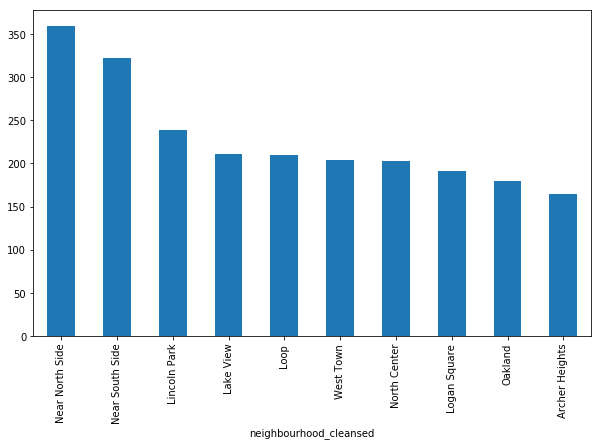

In [54]:
# Find most expensive neighborhoods
df_hoods_hi = df.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values(ascending=False).head(10)
df_hoods_hi.plot(kind='bar', x='neighbourhood_cleansed', y='price', figsize=(10,6))
plt.show()

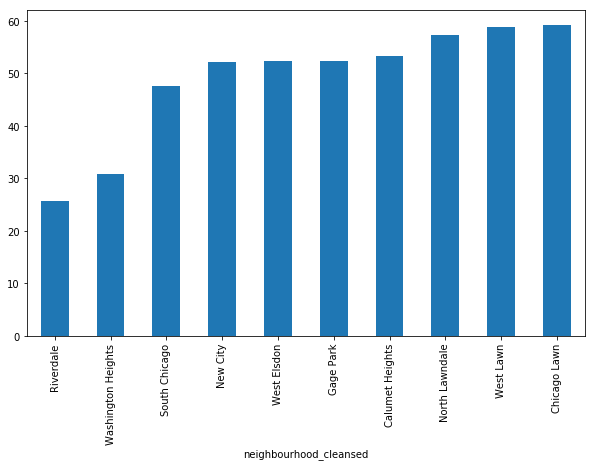

In [55]:
# Find least expensive neighborhoods
df_hoods_low = df.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values(ascending=True).head(10)
df_hoods_low.plot(kind='bar', x='neighbourhood_cleansed', y='price', figsize=(10,6))
plt.show()

## Do small businesses have better ratings than hosts with one property?

In [56]:
# Look for cutoff between private owners and small businesses
df.groupby(['host_listings_count'])['review_scores_rating'].count()

host_listings_count
0        376
1       2499
2       1097
3        569
4        402
5        249
6        198
7        113
8        128
9         76
10       113
11        27
12        72
13        84
14        45
15        37
16        47
17        32
18         7
19        48
21        38
22       122
23         4
24        63
25         6
26         4
27         0
28         9
29        19
30        21
31        29
33        38
34        29
36        63
37         0
45        48
49        27
50         5
52        22
57        55
65        55
73        59
79        48
87         6
100       83
159        5
214        1
376       13
408       14
491        4
878       96
1037      11
1083      53
1779       9
1820      10
Name: review_scores_rating, dtype: int64

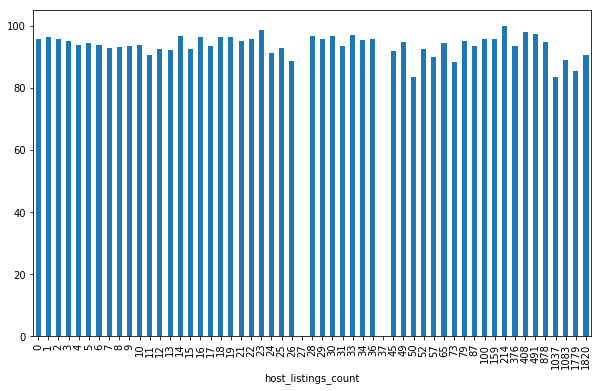

In [57]:
# Graph average rating of all host counts
df_host_compare = df.groupby(['host_listings_count'])['review_scores_rating'].mean()
df_host_compare.plot(kind='bar', x='Host Listings', y='Average Rating', figsize=(10,6))
plt.show()

## Can we predicting prices?

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Check for NaN values

In [59]:
# Find percent of columns' rows with NaN values
print("Percent of rows with NaN values")
cols_with_nan = df.columns[df.isnull().sum() > 0]
for col in cols_with_nan:
    print(col,": ",np.round(df[col].isnull().mean() * 100, decimals=2), "%")
    
df[cols_with_nan].head()

Percent of rows with NaN values
host_response_time :  9.66 %
host_response_rate :  9.66 %
zipcode :  0.26 %
bathrooms :  0.04 %
bedrooms :  0.05 %
beds :  0.06 %
security_deposit :  24.44 %
cleaning_fee :  9.79 %
review_scores_rating :  14.57 %
review_scores_accuracy :  14.57 %
review_scores_cleanliness :  14.57 %
review_scores_checkin :  14.58 %
review_scores_communication :  14.59 %
review_scores_location :  14.58 %
review_scores_value :  14.58 %
reviews_per_month :  14.0 %


,host_response_time,host_response_rate,zipcode,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,within an hour,100.0,60637,1.0,1.0,1.0,0.0,0.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2.97
1,within a few hours,100.0,60608,1.0,3.0,4.0,0.0,25.0,96.0,10.0,9.0,10.0,10.0,9.0,9.0,2.99
2,within an hour,100.0,60622,1.0,1.0,1.0,0.0,0.0,93.0,10.0,9.0,10.0,10.0,10.0,10.0,2.93
3,within an hour,94.0,60614,1.0,1.0,0.0,NaN,95.0,92.0,10.0,9.0,10.0,9.0,10.0,9.0,0.72
4,within an hour,75.0,60615,1.0,1.0,1.0,200.0,50.0,82.0,8.0,7.0,9.0,9.0,10.0,9.0,0.70


How to deal with each:

* host_response_time - dummy NaN
* host_response_rate - fill with mean
* zipcode - drop
* bathrooms - fill with mean
* bedrooms - fill with mean
* beds - fill with mean
* security_deposit - fill with mean
* cleaning_fee - fill with mean
* review_scores_rating - fill with mean
* review_scores_accuracy - fill with mean
* review_scores_cleanliness - fill with mean
* review_scores_checkin - fill with mean
* review_scores_communication - fill with mean
* review_scores_location - fill with mean
* review_scores_value - fill with mean
* reviews_per_month - fill with mean

In [60]:
# Drop rows with missing data
df.dropna(subset=['zipcode'], axis=0, inplace=True)

In [61]:
# Fill missing values with the mean
df.fillna(value=df.mean(), inplace=True)

### Create dummy columns

In [62]:
# Create dummy columns for categorical variables in X
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    try:
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=True)], axis=1)
    except:
        print("Cannot create dummies for ", col)
        continue

### Split data for modeling

In [63]:
# Split your data into an X matrix and a response vector y
X = df.drop('price', axis=1)
y = df['price']

In [64]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Create linear regression model

In [65]:
# Instantiate a Linear Regression model with normalized data
lm_model = LinearRegression(normalize=True)
# Fit the model to the training
lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [66]:
# Predict the response for the training and test data sets
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test)

### Check the accuracy of the model

In [67]:
# Obtain an R-squared value for both sets
train_score = r2_score(y_train_preds, y_train)
test_score = r2_score(y_test_preds, y_test)

print("R-squared scores")
print("Training set: %.2f" % train_score)
print("Test set:     %.2f" % test_score)

R-squared scores
Training set: -4.67
Test set:     -0.00
